<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Direcao_maior_decrescimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cálculo Numérico**

José Claudinei Ferreira

Universidade Federal de Alfenas

#**A direção de maior decrescimento de uma função $f:U\to \mathbb{R}$.**

#**Um exemplo:** Considere a função $f(x)=x^5-x+1$.

In [ ]:
def f(x):
  return x**5-x+1

Vejamos o gráfico de $f(x)$:

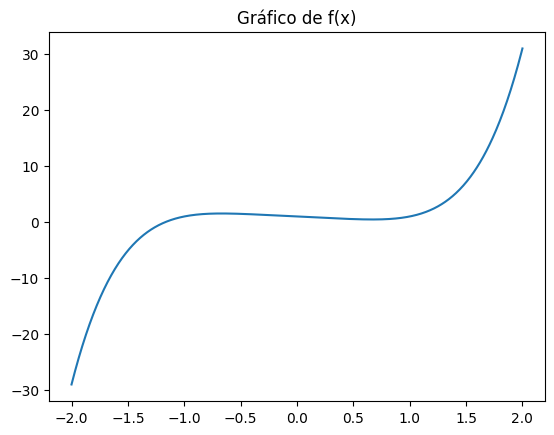

In [ ]:
import matplotlib.pyplot as plt, numpy as np

x=np.linspace(-2,2,1000)      # Cria 1000 pontos entre -2 e 2, igualmente espaçados.

y=f(x)

plt.plot(x,y)
plt.title('Gráfico de f(x)')
plt.show()

Sabemos do curso de Cálculo que $f'(x)=5x^4-1$ nos dá a direção de crescimento de $f(x)$.

Então, se caminharmos, no eixo $x$, na direção oposta a $f´(x)$, iremos na direcção em que $f(x)$ decresce.

Por exemplo, considere que no tempo $t=0$, começamos a nos mover sobre o eixo $x$, comecando em $x=2$.

Como $f(2)=2^5-2+1=32-2+1=31>0$, se seguirmos no trajeto $x(t)$, tal que $$\begin{cases}x'(t)&=&-(5x(t)^4-1)\\x(0)&=&2\end{cases},\tag{1}$$ teremos que $f(x(t))$ será decrescente, para todo $t>0$, porque $f'(x(t))=5x(t)^4-1$.

Então devemos ter $f(x(t))\approx f(x_{min})$, mínimo local de $f(x)$, para $t$ grande o suficiente.

In [ ]:
def F(u):
  return 5*u**4-1

Vamos usar o método de Euler para resolver numéricamente a Equação $(1)$ e estimar o valor de $x(10)$.

In [ ]:
t0=0
u=2                         # u(0)=2
tf=10
n=1000
h=tf/n

for i in range(1,n):
  u=u-h*F(u)               # Método de Euler para a Equção (2).

print('x=',u,',f(x)=',f(u),'e F(x)=',F(u))

x= 0.6687403049764229 ,f(x)= 0.46500775601886235 e F(x)= 5.10702591327572e-15


Veja que $f(x)$ possui um valor mínimo local em $[0.5,1]$.

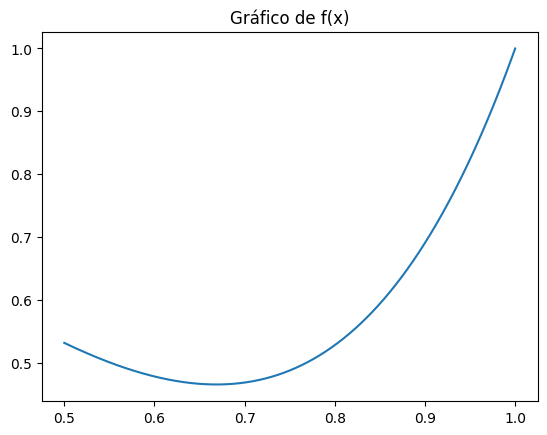

In [ ]:
x=np.linspace(0.5,1,1000)

y=f(x)

plt.plot(x,y)
plt.title('Gráfico de f(x)')
plt.show()

Note que, nesse caso particular, $f'(x)=0$ nos dá $$x=\pm\sqrt[4]{\frac{1}{5}}\approx \pm 0.668740304976422,$$ e que um desses foi o valor que obtemos anteriormente, pelo método de Euler.

Segue que $f(x)$ possui um valor máximo local em $x=-\sqrt[4]{\frac{1}{5}}$, como pode ser visto graficamente:

In [ ]:
print('x=',-u,',f(x)=',f(-u),'e F(x)=',F(-u))

x= -0.6687403049764229 ,f(x)= 1.5349922439811376 e F(x)= 5.10702591327572e-15


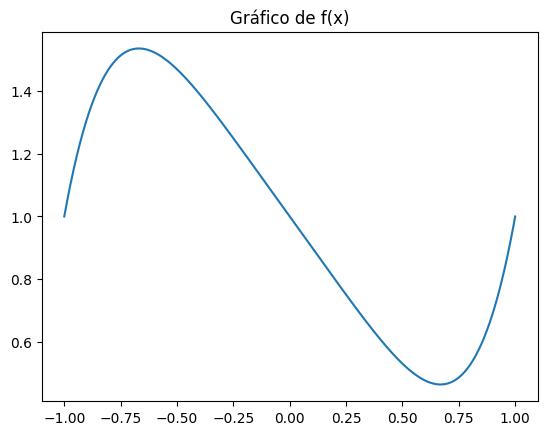

In [ ]:
x=np.linspace(-1,1,1000)

y=f(x)

plt.plot(x,y)
plt.title('Gráfico de f(x)')
plt.show()

Se não sobessemos resolver a equação $f'(x)=0$, poderíamos ter encontrado esse valor de máximo local de $f(x)$ resolvendo numericamente a equação diferencial
$$\begin{cases}x'(t)&=&5x(t)^4-1\\x(0)&=&-2\end{cases},\tag{2},$$ que nos dá uma forma de seguirmos sobre o eixo $x$, iniciando em $x=-2$ e de tal forma que $f(x)$ cresca.

Veja isso como método de Euler:

In [ ]:
t0=0
u=-2                       # u(0)=2
tf=10
n=1000
h=tf/n

for i in range(1,n):
  u=u+h*F(u)               # Método de Euler para a Equção (2).

print('x=',u,',f(x)=',f(u),'e F(x)=',F(u))

x= -0.6687403049764229 ,f(x)= 1.5349922439811376 e F(x)= 5.10702591327572e-15


**Resolvendo a equação $f(x)=0$:**

Podemos usar essa ideia de crescimento e descrecimento de funções para resolver a equação $$f(x)=0,\tag{3}$$ em vez de calcular máximos e mínimos locais.

Para isso, consideramos uma função auxiliar $$g(x)=\frac{1}{2}|f(x)|^2.$$

É claro que o valor mínimo de $g(x)$ é 0, uma vez que a Equação $(3)$ tem solução; e pelo último gráfico sabemos que é uma valor menor que $-1$.

Podemos resolver a equação diferencial
$$\begin{cases}x'(t)&=&-f(x)f'(x)\\x(0)&=&-1\end{cases},\tag{4},$$ uma vez que $g'(x)=f(x)f'(x)$, pela regra da cadeia.

Vejamos isso numéricamente, para estimar $x(10)$:

In [ ]:
t0=0
u=-1                      # u(0)=-1
tf=10
n=1000
h=tf/n

for i in range(1,n):
  u=u-h*f(u)*F(u)               # Método de Euler para a Equção (4).

print('x=',u,',f(x)=',f(u),'e F(x)=',F(u))

x= -1.1673039782614185 ,f(x)= 1.3322676295501878e-15 e F(x)= 8.283374419272509


Enfim, $x= -1.1673039782614185$ é uma aproximação para a única solução real da Equação $(3)$.

#**Outro exemplo:**

Considere agora a equação, ou o sistema de equações, $$\begin{cases}x^2+y^2&=&4\\\\2 x^2-x y+y^2&=&6\end{cases}\tag{5}.$$

Lembrando um pouco de Geometria Analítica, temos que trata-se da intersecção de um círculo com uma elipse, o que pode produzir até 4 soluções $(x,y)$.

Vamos definir a função
$$f(u)=\begin{bmatrix}x^2+y^2-4\\2x^2-xy+y^2-6\end{bmatrix}$$ e a função $$g(u)=\frac{1}{2}\|f(u)\|^2=\frac{1}{2}((x^2+y^2-4)^2+(2x^2-xy+y^2-6)^2),$$ para $u=(x,y)$.

Você pode verificar que $$g'(u)=\left[Jf(u)\right]^t f(u)=\nabla g(u),$$ que é chamado de vetor gradinete de $g(u)$, em que
$$f'(u)=Jf(u)=\begin{bmatrix}2x&2y\\2x-y&2y-x\end{bmatrix}.$$

Mais uma vez, sabemos lá do curso de cálculo que a direção em que $g(u)$ mais decresce é a direção oposta a do vetor gradiente $\nabla g(u)$. Então esse trejeto, partindo de um ponto $u_0$, é dado por $$\begin{cases}u'(t)&=&-\nabla g(u(t))\\\\u(0)&=&u_0\end{cases}\tag{6}.$$

Isso e o métod de Euler dão origem ao chamado [método do grandente para problemas de minimização](https://pt.wikipedia.org/wiki/M%C3%A9todo_do_gradiente#:~:text=M%C3%A9todo%20do%20gradiente%201%20Pesquisa%20exata%20e%20inexata,m%C3%ADnimos%20quadrados.%20...%204%20Notas%20e%20Refer%C3%AAncias%20).

Vejamos isso, tomando $u_0=(2,2)$:

In [ ]:
def f(u):
  x=u[0]
  y=u[1]
  p=x**2+y**2-4
  q=2*x**2-x*y+y**2-6
  return np.array([p,q])

f([2,2])              # Tesde de f(u).

array([4, 2])

In [ ]:
def g(u):
  return np.linalg.norm(f(u)/2)

g([2,2])              # Teste de g(u).

2.23606797749979

In [ ]:
def Jf(u):
   x=u[0]
   y=u[1]
   p=[[2*x,2*y],[4*x-y,2*y-x]]
   return np.array(p)

Jf([2,2])              # Teste de Jf(u).

array([[4, 4],
       [6, 2]])

In [ ]:
def gradg(u):
  p=np.transpose(Jf(u))@f(u)     # @ denota o produto de matrizes
  return p

gradg([2,2])                     # Teste de grad g(u).

array([28, 20])

Método de Euler:

In [ ]:
u0=[2,2]
h=0.001
n=10000

u=[u0]

for i in range(0,n+1):
  u.append(u[i]-h*gradg(u[i]))

print('Ponto d mínimo aproximado',u[n], '.\n Gradiente no ponto aproximado',gradg(u[n]),'.\n f(u)=',f(u[n]))

Ponto d mínimo aproximado [1.84775907 0.76536686] .
 Gradiente no ponto aproximado [-2.32028684e-11  3.61087959e-10] .
 f(u)= [ 2.10814477e-10 -1.21085364e-10]


Gráfico do trajeto $u(t)$ aproximado:

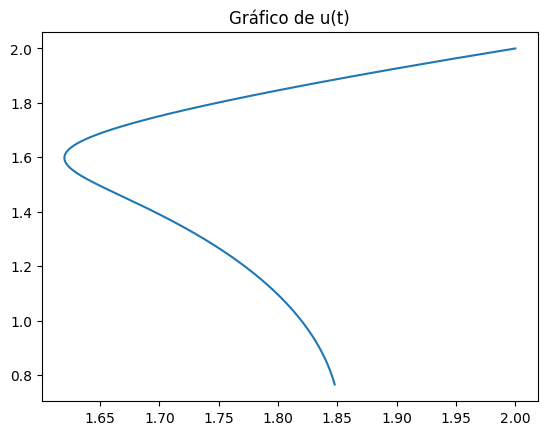

In [ ]:
u=np.transpose(u)
x=u[0]
y=u[1]

plt.plot(x,y)
plt.title('Gráfico de u(t)')
plt.show()

Grafíco aproximado de $g(u(t))$:

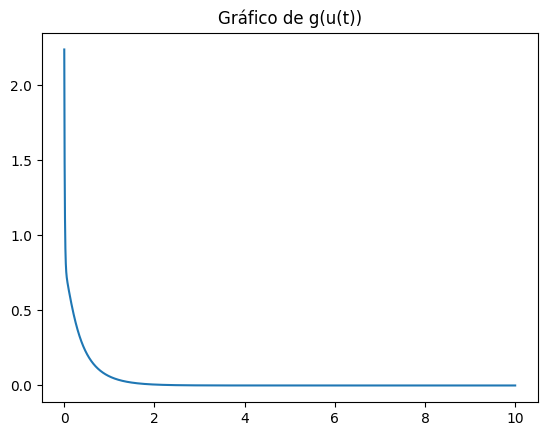

In [ ]:
t=np.linspace(0,n*h,n+1)

gu=[]
for i in range(0,n+1):
  gu.append(g([x[i],y[i]]))

plt.plot(t,gu)
plt.title('Gráfico de g(u(t))')
plt.show()

**Curvas definidas pela equação $f(u)=0$.**

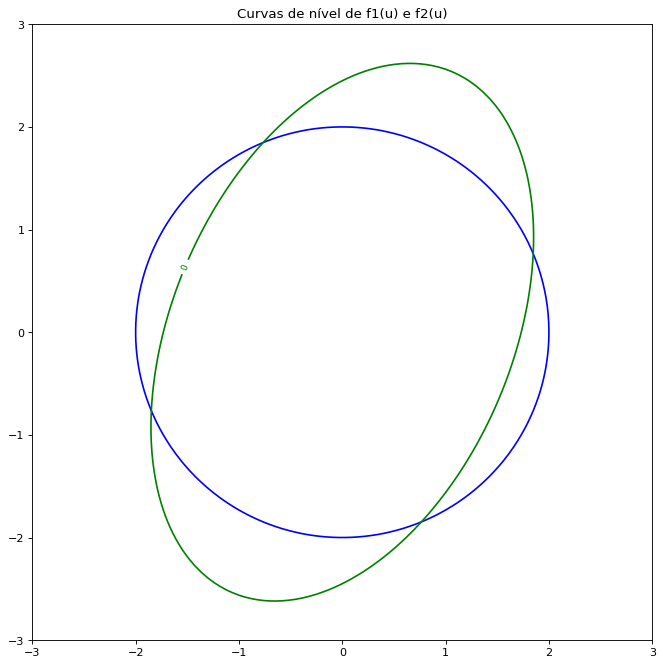

In [ ]:
from mpl_toolkits.mplot3d import axes3d             # para fazer gráficos

def f1(u):
  p=f(u)[0]
  return p

def f2(u):
  p=f(u)[1]
  return p

#---------------------------------------- Para fazer gráficos de f1(x,y) e f2(x,y)
xf,yf = np.mgrid[-3:3:100j,-3:3:100j]
wf1=0*xf
wf2=0*xf

for i in range(0,100):
  for j in range(0,100):
    wf1[i][j]=f1([xf[i][j],yf[i][j]])
    wf2[i][j]=f2([xf[i][j],yf[i][j]])

# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf, yf, wf1,[0],colors='blue')
CS = ax.contour(xf, yf, wf2,[0],colors='green')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de nível de f1(u) e f2(u)")
plt.show()

Juntando as curvas:

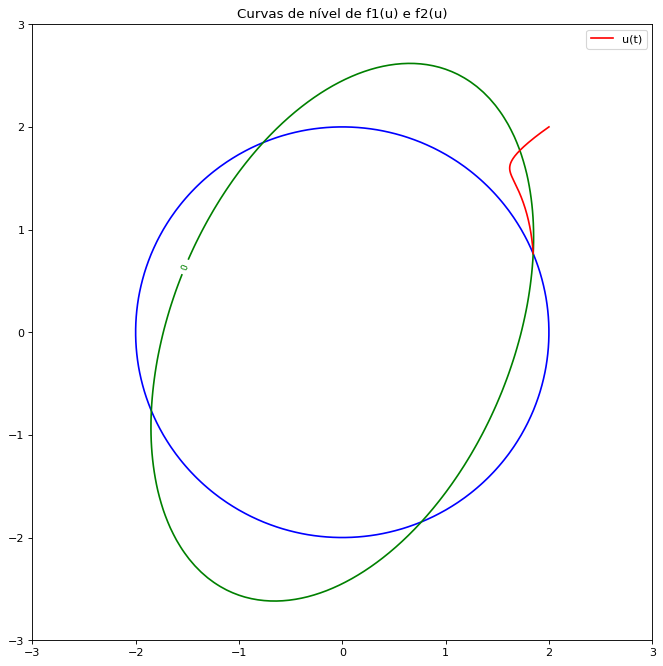

In [ ]:
# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf, yf, wf1,[0],colors='blue')
CS = ax.contour(xf, yf, wf2,[0],colors='green')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de nível de f1(u) e f2(u)")
plt.plot(x,y,color='red',label='u(t)')
plt.legend()
plt.show()

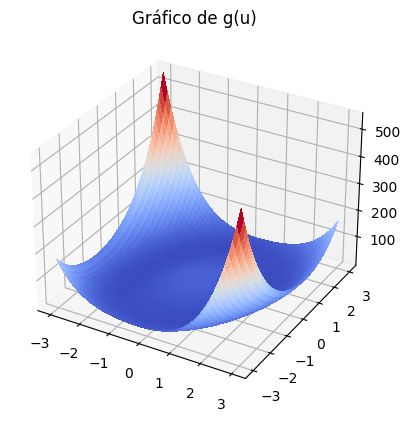

In [ ]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X=np.linspace(-3,3,1000)
Y=X
X, Y = np.meshgrid(X, Y)
Z=((X**2+Y**2-4)**2+(2*X**2-X*Y+Y**2-6)**2)/2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title("Gráfico de g(u)")
plt.show()


Curvas de níveol de $g(u)$:

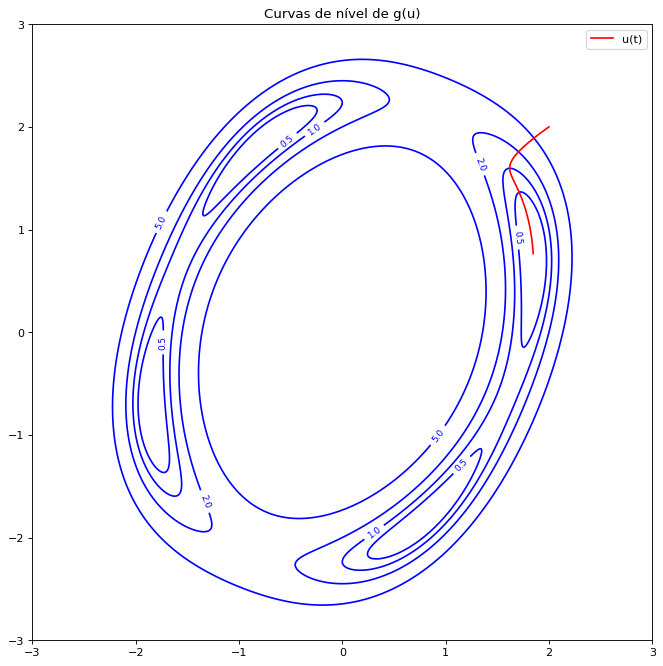

In [ ]:
# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(X,Y,Z,[0.5,1,2,5],colors='blue')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de nível de g(u)")
plt.plot(x,y,color='red',label='u(t)')
plt.legend()
plt.show()